# 課題（ilect上で提出してください）

## Matplotlibを使ったデータ可視化

下記の「#common」で始まるセルの中で指定されたリンク先にある購買データをベースに以下の問いに答えて、課題を提出してください。（データの前処理は、以下の記載の通りに行ってください。）
    
購買者（CustomerID）の各合計購買金額を算出し、さらに金額をベースに降順に並び替えをします。カラムがCustomerIDと合計金額のあるテーブルを作成してください。そこから、購買者を10等分にグループ分けします（例：100人いたら、10人ずつにグループ分けします。）。それぞれのグループでの合計購買金額の範囲と、それぞれの金額合計値を算出してください（このアプローチをデシル分析といいます。）。この結果を用いて、パレートの法則（上位2割の顧客が売上全体の8割を占める）を確かめるため、**それぞれのグループが売上の何割を占めるか（Pandas.Series形式で売上が小さいグループが先頭、大きいほど後になるようにしてください）**提出してください。
(なお、マーケティング戦略では、このように顧客を分けることをセグメンテーションといい、上位2割に絞ってアプローチを仕掛けることをターゲティングといいます。それぞれの戦略によりますが、優良顧客に的を絞った方が投資対効果が高いことが多いため、このようなアプローチを取ることがあります。)

提出するときは、以下の点に注意してください。  
>- 以下の関数homeworkの!!WRITE ME!!に処理を書いてください。(**「!!WRITE ME!!」は消して、記入してください。**)
>- 実際の提出は記述されたhomework関数全てになり、**提出場所はilect右上にある青字のHomeworkドロップダウンメニューからSaveしてください。Solutionに関数を貼り付けてからSaveを押してください。**
>- 前処理は以下のコードを使ってください。  
>- 返り値がPandas.Series形式になるようにしてください。  
>- 解答は、my_result=pd.Series([0,0.01,0.02,0.021,0.022,0.025,0.025,0.1,0.2,0.6]) のような形になります。(売上割合は昇順にして、合計は1になるようにします。)

In [37]:
# common
import pandas as pd
import numpy as np

## init part(データの読み込みと前処理)
file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)
online_retail_data_table = online_retail_data.parse('Online Retail')

online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])

# InvoiceNoの先頭が5であるものとIDがNullでないものが対象
target_online_retail_data_tb = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') 
                                                        & (online_retail_data_table.CustomerID.notnull())]

target_online_retail_data_tb = target_online_retail_data_tb.assign(TotalPrice=target_online_retail_data_tb.Quantity * target_online_retail_data_tb.UnitPrice)

In [38]:
# working place. everything 
def homework(target_online_retail_data_tb):
    
    #TotalPriceを昇順で並び替え
    target_online_retail_data_tb.sort_values("TotalPrice", inplace=True)
    
    #TotalPraiceを10に分割して、そのグループ毎で最小、最大、合計値を計算
    target_online_retail_data_tb["TotalPraice_qcut"] = pd.qcut(target_online_retail_data_tb["TotalPrice"], 10)
    grup_Totalpraice_quct = target_online_retail_data_tb.groupby("TotalPraice_qcut", as_index = False)["TotalPrice"].sum()
    
    #比率を出して返り値の変数に代入
    my_result = grup_Totalpraice_quct["TotalPrice"] / grup_Totalpraice_quct["TotalPrice"].sum()
    
    return my_result  

In [40]:
homework(target_online_retail_data_tb)

0    0.005543
1    0.014204
2    0.018712
3    0.032584
4    0.044705
5    0.074351
6    0.063273
7    0.088797
8    0.117925
9    0.539904
Name: TotalPrice, dtype: float64

In [2]:
target_online_retail_data_tb.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34


In [2]:
target_online_retail_data_tb = target_online_retail_data_tb[["CustomerID","TotalPrice"]]
target_online_retail_data_tb.sort_values("TotalPrice", inplace=True)

In [3]:
target_online_retail_data_tb["TotalPraice_qcut"] = pd.qcut(target_online_retail_data_tb["TotalPrice"], 10)

In [23]:
grup_Totalpraice_quct = target_online_retail_data_tb.groupby("TotalPraice_qcut", as_index = False)["TotalPrice"].sum()
grup_Totalpraice_quct

,TotalPraice_qcut,TotalPrice
0,"(-0.001, 1.95]",49395.664
1,"(1.95, 3.75]",126577.560
2,"(3.75, 5.8]",166749.650
3,"(5.8, 8.5]",290373.020
4,"(8.5, 11.8]",398386.690
5,"(11.8, 15.0]",662574.780
6,"(15.0, 17.4]",563853.980
7,"(17.4, 20.8]",791308.050
8,"(20.8, 35.4]",1050882.200
9,"(35.4, 168469.6]",4811306.310


In [24]:
grup_Totalpraice_quct["Percentage"] = grup_Totalpraice_quct["TotalPrice"] / grup_Totalpraice_quct["TotalPrice"].sum()
grup_Totalpraice_quct

,TotalPraice_qcut,TotalPrice,Percentage
0,"(-0.001, 1.95]",49395.664,0.005543
1,"(1.95, 3.75]",126577.560,0.014204
2,"(3.75, 5.8]",166749.650,0.018712
3,"(5.8, 8.5]",290373.020,0.032584
4,"(8.5, 11.8]",398386.690,0.044705
5,"(11.8, 15.0]",662574.780,0.074351
6,"(15.0, 17.4]",563853.980,0.063273
7,"(17.4, 20.8]",791308.050,0.088797
8,"(20.8, 35.4]",1050882.200,0.117925
9,"(35.4, 168469.6]",4811306.310,0.539904


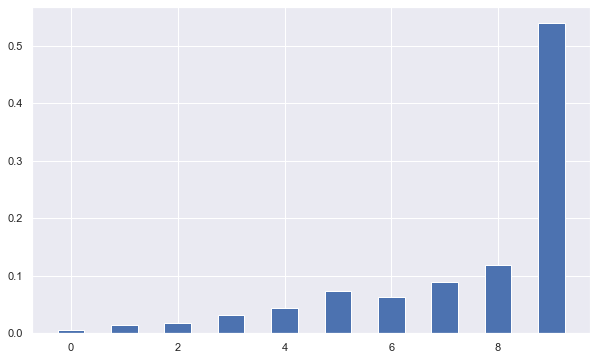

In [33]:
x = grup_Totalpraice_quct.index
y = grup_Totalpraice_quct["Percentage"]

# グラフの大きさ指定  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# グリッドを表示
plt.grid(True)

In [26]:
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline